In [34]:
import numpy as np
current_state = np.random.get_state()
np.random.set_state(current_state)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time 
import random
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from scipy import stats
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
cc = pd.read_csv('creditcard.csv')
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


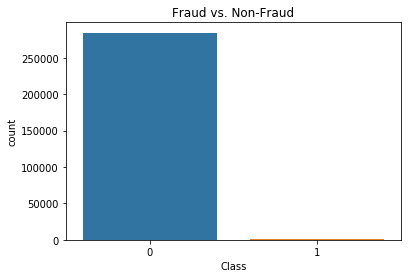

0    284315
1       492
Name: Class, dtype: int64

There are 284807 number of transactions.
The fraud percentage is 0.1727485630620034%.


In [3]:
sns.countplot('Class', data=cc)
plt.title('Fraud vs. Non-Fraud')
plt.show()

print(cc.Class.value_counts())
print('\nThere are {} number of transactions.\nThe fraud percentage is {}%.'.format(
    len(cc['Class']),
    len(cc[cc['Class']==1])/len(cc['Class'])*100))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    cc.drop('Class', axis=1), 
    cc.Class,
    test_size=0.25)

print('The training percentage fraud is: {}%.'.format(
    len(y_train[y_train == 1])/len(y_train)*100))
print('The test percentage fraud is: {}%.'.format(
    len(y_test[y_test == 1])/len(y_test)*100))

The training percentage fraud is: 0.17696214976241192%.
The test percentage fraud is: 0.16010786213870395%.


In [5]:


random = RandomUnderSampler()
X_random, y_random = random.fit_sample(X=X_train, y=y_train)

print('Resampled Training Set Percent Fraud: {}'.format(
    len(y_random[y_random == 1])/len(y_random)*100))

Resampled Training Set Percent Fraud: 50.0


In [6]:
lr = LogisticRegressionCV(Cs=[1,10,50,100], 
                               penalty='l1',
                         solver='liblinear')
lr.fit(X_random, y_random)
print(lr.score(X_random, y_random))

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



0.9537037037037037


The recall percentage is is: 92.5925925925926%.


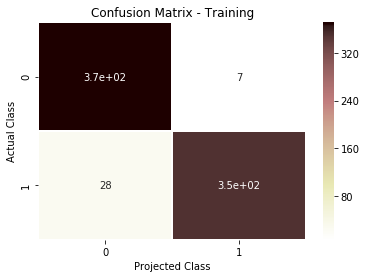

In [7]:
ypredictor = lr.predict(X_random)
confmatrix = confusion_matrix(y_random, ypredictor)
recall = confmatrix[1,1]/(confmatrix[1,1]+confmatrix[1,0])
print('The recall percentage is is: {}%.'.format(recall*100))
sns.heatmap(confmatrix, 
            cmap='pink_r', 
            annot=True, 
            linewidths=0.6)
plt.title('Confusion Matrix - Training')
plt.xlabel('Projected Class')
plt.ylabel('Actual Class')
plt.show()

The recall percentage is is: 93.85964912280701%.


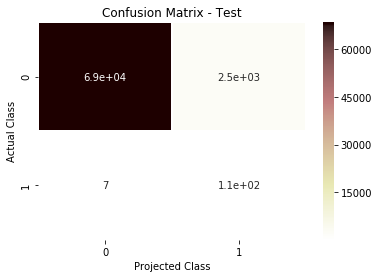

In [8]:
ytestpredictor = lr.predict(X_test)
conmatrixtest = confusion_matrix(y_test, ytestpredictor)
recall = conmatrixtest[1,1]/(conmatrixtest[1,1]+conmatrixtest[1,0])
print('The recall percentage is is: {}%.'.format(recall*100))
sns.heatmap(conmatrixtest, 
            cmap='pink_r', 
            annot=True, 
            linewidths=0.6)
plt.title('Confusion Matrix - Test')
plt.xlabel('Projected Class')
plt.ylabel('Actual Class')
plt.show()

In [33]:
rfc = RandomForestClassifier()
cross_val_score(rfc, X_train, y_train, cv=5)

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

c:\users\ben\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change f

array([0.99929779, 0.99939141, 0.99943822, 0.99955524, 0.99946161])

In [11]:
svc = SVC(kernel='linear', C=10)
svc.fit(X_random, y_random)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

The recall percentage is is: 81.74603174603175%


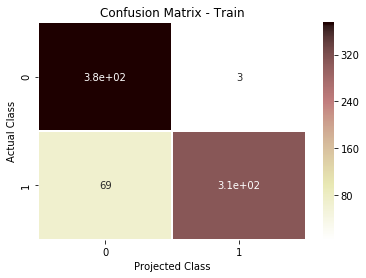

In [19]:
ypredsvc = svc.predict(X_random)
confmatrixsvc = confusion_matrix(y_random, ypredsvc)

recallsvc = confmatrixsvc[1,1]/(confmatrixsvc[1,1]+confmatrixsvc[1,0])
print('The recall percentage is is: {}%'.format(recallsvc*100))

sns.heatmap(confmatrixsvc, 
            cmap='pink_r', 
            annot=True, 
            linewidths=0.6)
plt.title('Confusion Matrix - Train')
plt.xlabel('Projected Class')
plt.ylabel('Actual Class')
plt.show()

The recall percentage is is: 84.21052631578947%


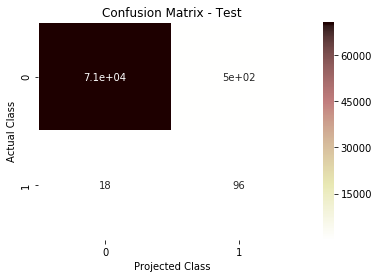

In [21]:
ypredsvc = svc.predict(X_test)
confmatrixsvc = confusion_matrix(y_test, ypredsvc)

recallsvc = confmatrixsvc[1,1]/(confmatrixsvc[1,1]+confmatrixsvc[1,0])
print('The recall percentage is is: {}%'.format(recallsvc*100))

sns.heatmap(confmatrixsvc, 
            cmap='pink_r', 
            annot=True, 
            linewidths=0.6)
plt.title('Confusion Matrix - Test')
plt.xlabel('Projected Class')
plt.ylabel('Actual Class')
plt.show()

In [31]:


print('{}% is the Logistic Regresssion for the F1 score.'.format(f1_score(y_test, ytestpredictor)*100))
print('{}% is the SVC Regression for the F1 score.'. format(f1_score(y_test, ypredsvc)*100))

7.739602169981917% is the Logistic Regresssion for the F1 score.
27.080394922425953% is the SVC Regression for the F1 score.
